## Liver Diseases 

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Loading the train and test data sets 
train = pd.read_csv(r'C:\Users\hp\Desktop\Data-Science\04.Capstone-Projects\Machine Learning Models Solutions\Machine Learning Hackaton Samples\Liver_Disease_Prediction\train_dataset.csv')
test = pd.read_csv(r'C:\Users\hp\Desktop\Data-Science\04.Capstone-Projects\Machine Learning Models Solutions\Machine Learning Hackaton Samples\Liver_Disease_Prediction\test_dataset.csv')

In [ ]:
# Lets explore the data first
test.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [5]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [6]:
# Lets use floor division to round off the division for Age
train['Age_in_years'] = train['Age'] // 366
test['Age_in_years'] = test['Age'] // 366

In [7]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,...,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0,53
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,...,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0,62
2,7254,297,D,NaN,27957,F,N,N,NaN,N,...,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0,76
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,...,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0,57
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,...,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0,49


## Exploratory Data Analysis

In [8]:
# lets see the shape of our Data
print(train.shape)
print(test.shape)

(6800, 21)
(3200, 20)


In [14]:
train[train.dtypes[train.dtypes == 'object'].index].shape

(6800, 7)

In [12]:
train[train.dtypes[train.dtypes == float].index].shape

(6800, 10)

In [13]:
train[train.dtypes[train.dtypes == 'int64'].index].shape

(6800, 4)

In [15]:
# Checking for missing values 
train.isnull().sum()

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
Age_in_years        0
dtype: int64

## Univariate Analysis

In [30]:
# some helper function for data analysis
# For Plot Annotation

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

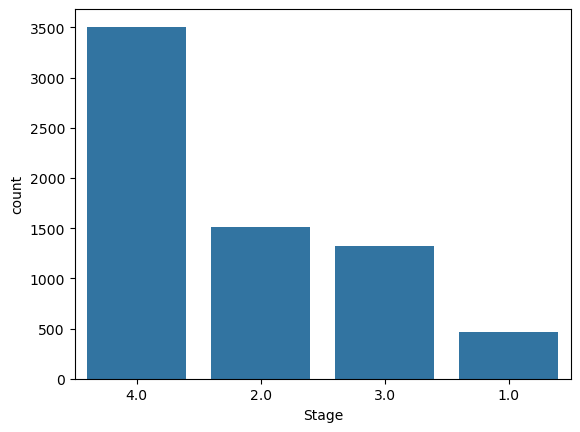

In [32]:
# checking for the target variable
#plt.figure(figsize=(10,7))
ax = sns.countplot(x='Stage', data=train, order = train['Stage'].value_counts().index)

it shows us that mostly the patient belongs to stage 4.0

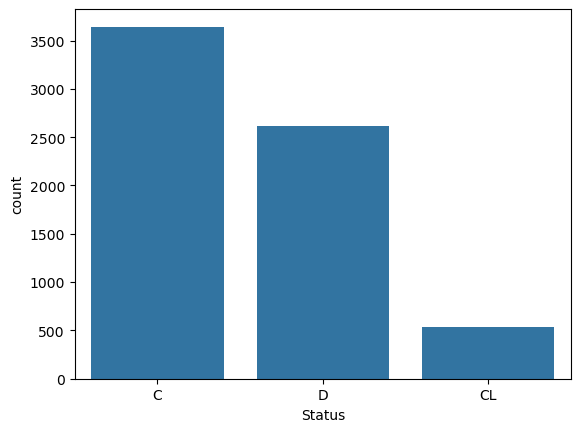

In [33]:
# checking the status of the patient
ax = sns.countplot(x='Status', data=train, order = train['Status'].value_counts().index)

Most of the patients are censored (C) with higher percentage, followed by Death (D) and Censored due to liver tx (c). 

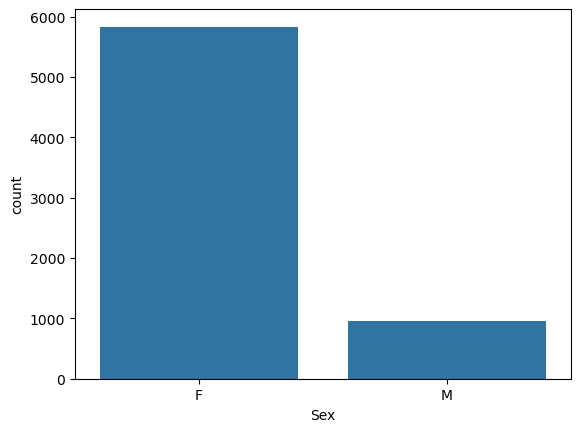

In [25]:
## let check the Gender of the patient
ax = sns.countplot(x='Sex', data=train, order = train['Sex'].value_counts().index)

Most Sex in the data belong to Female 

In [27]:
# Univariate Analysis on Numeric data
train[train.dtypes[train.dtypes == float].index].describe()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


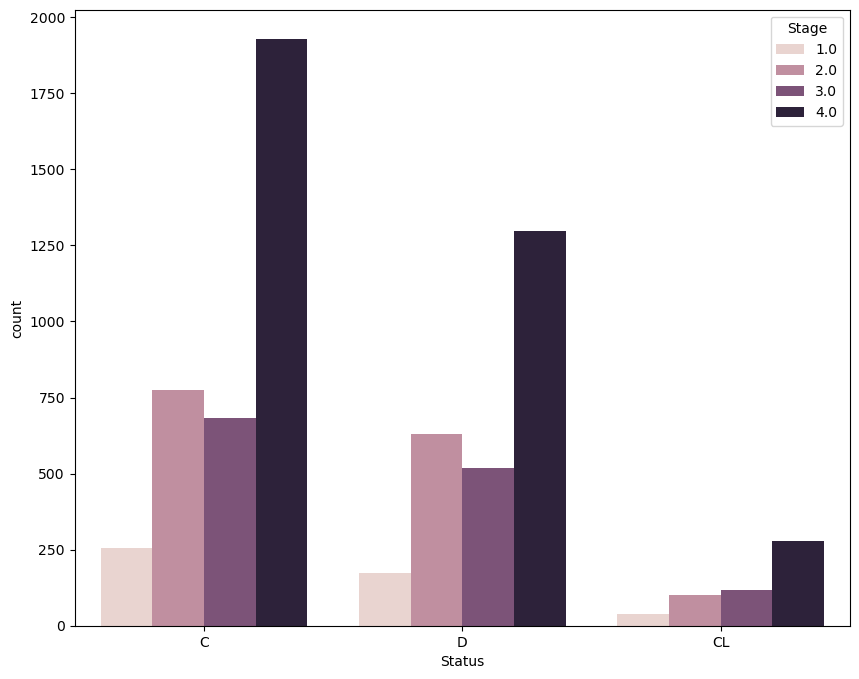

In [34]:
# Bi-variate Analysis on the categorical features
# Exploring some features with respect to target
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Status', data=train,hue='Stage', order = train['Status'].value_counts().index)

it shows that Stage 4 has the most percentage on each status of the patient but with least percentage on the Death Status with 

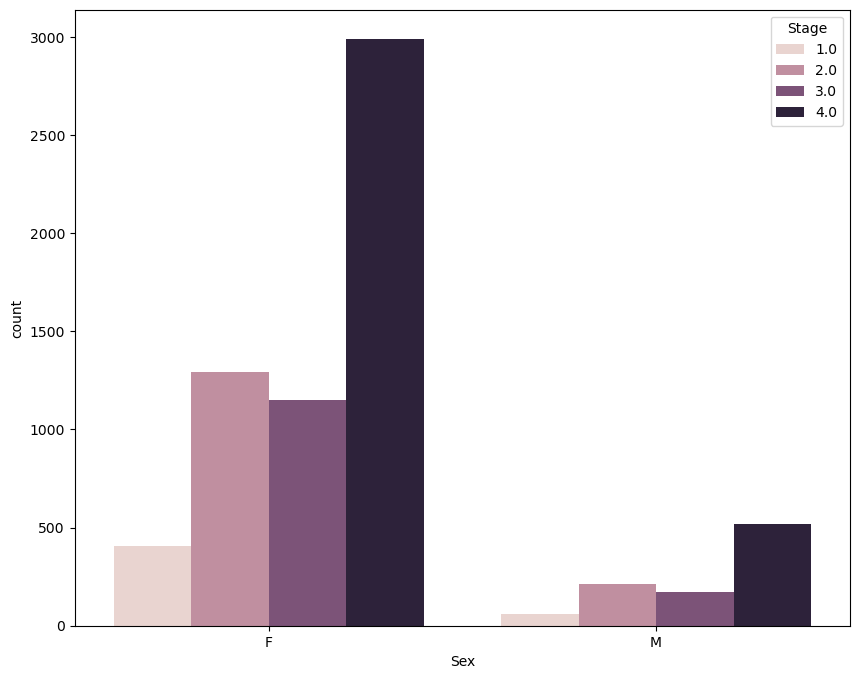

In [35]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Sex', data=train,hue='Stage', order = train['Sex'].value_counts().index)

There is balance in Stages across male and female in the dataset

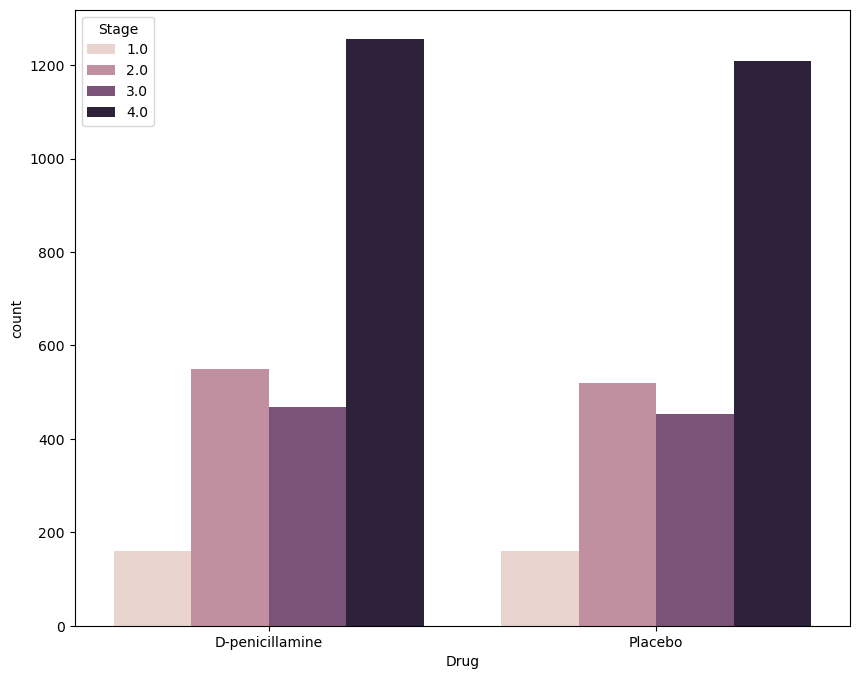

In [36]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Drug', data=train,hue='Stage', order = train['Drug'].value_counts().index)

There is balance in liver stage using both drugs.

<Axes: xlabel='Age_in_years', ylabel='Cholesterol'>

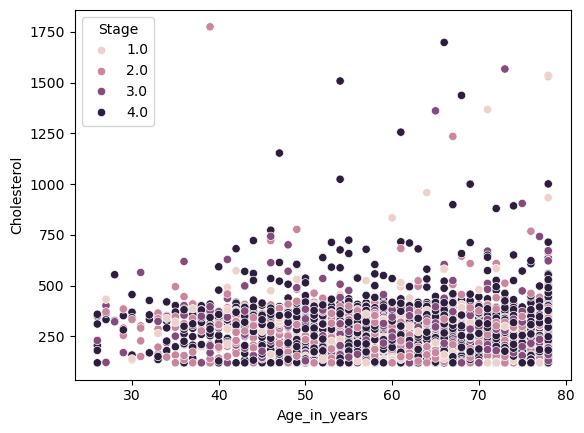

In [37]:
sns.scatterplot(y='Cholesterol', x='Age_in_years', hue='Stage', data=train)

We observe from the data that that most of the stage falls within the range of 120 cholestrol to 500 no matter the Age.

Major observation there is an extreme outlier with **Age** 40 and **Cholostrol** 1750 belongs to stage 1

there is an extreme outlier with **Age** 65 and **Cholostrol** 1650 belongs to stage 4

## Handling Missing Values 

In [38]:
train['Drug'].value_counts()

Drug
D-penicillamine    2434
Placebo            2341
Name: count, dtype: int64

In [39]:
train['Drug'].fillna(method='ffill').value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_11004\959410258.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['Drug'].fillna(method='ffill').value_counts()


Drug
D-penicillamine    3494
Placebo            3306
Name: count, dtype: int64

In [ ]:
#Filling the Categorical missing value with ffill with help to reduce the bias in the categorical features distribution.
train['Drug'] = train['Drug'].fillna(method='ffill')
test['Drug'] = test['Drug'].fillna(method='ffill')

C:\Users\hp\AppData\Local\Temp\ipykernel_11004\3048474612.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['Drug'] = train['Drug'].fillna(method='ffill')
C:\Users\hp\AppData\Local\Temp\ipykernel_11004\3048474612.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test['Drug'] = test['Drug'].fillna(method='ffill')


In [43]:
cat_col = train[train.dtypes[train.dtypes == 'object'].index].columns
for col_cat in cat_col:
    train[col_cat] = train[col_cat].fillna(method='ffill')
    test[col_cat] = test[col_cat].fillna(method='ffill')

C:\Users\hp\AppData\Local\Temp\ipykernel_11004\2483806024.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[col_cat] = train[col_cat].fillna(method='ffill')
C:\Users\hp\AppData\Local\Temp\ipykernel_11004\2483806024.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test[col_cat] = test[col_cat].fillna(method='ffill')


## Data cleaning on the Numeric data

In [44]:
train[train.dtypes[train.dtypes == float].index].describe()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


we already feature engineered Age_in_years, by converting Age in days to year instead

In [45]:
# cleaning cholostrol in the dataset
asc_train = train.groupby(['Age_in_years', 'Sex'])['Cholesterol'].median()
asc_test = train.groupby(['Age_in_years', 'Sex'])['Cholesterol'].median()

In [46]:
train = train.merge(asc_train, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Cholesterol'] = train['Cholesterol'].fillna(train.pop('Cholesterol_'))
train['Cholesterol'] = train['Cholesterol'].fillna(value=0.0)

In [47]:
test = test.merge(asc_test, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Cholesterol'] = test['Cholesterol'].fillna(test.pop('Cholesterol_'))

# Now lets fill the missing values

In [48]:
# cleaning copper in the dataset
asc_train_copper = train.groupby(['Age_in_years', 'Sex'])['Copper'].median()
asc_test_copper = train.groupby(['Age_in_years', 'Sex'])['Copper'].median()
## Alk_Phos
asc_train_Alk_Phos = train.groupby(['Age_in_years', 'Sex'])['Alk_Phos'].median()
asc_test_Alk_Phos = train.groupby(['Age_in_years', 'Sex'])['Alk_Phos'].median()
## 'SGOT'
asc_train_SGOT = train.groupby(['Age_in_years', 'Sex'])['SGOT'].median()
asc_test_SGOT = train.groupby(['Age_in_years', 'Sex'])['SGOT'].median()
## Tryglicerides
asc_train_Tryglicerides = train.groupby(['Age_in_years', 'Sex'])['Tryglicerides'].median()
asc_test_Tryglicerides = train.groupby(['Age_in_years', 'Sex'])['Tryglicerides'].median()
## Platelets
asc_train_Platelets = train.groupby(['Age_in_years', 'Sex'])['Platelets'].median()
asc_test_Platelets = train.groupby(['Age_in_years', 'Sex'])['Platelets'].median()
## Prothrombin
asc_train_Prothrombin = train.groupby(['Age_in_years', 'Sex'])['Prothrombin'].median()
asc_test_Prothrombin = train.groupby(['Age_in_years', 'Sex'])['Prothrombin'].median()

# Merging with Data

In [49]:
train = train.merge(asc_train_copper, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Copper'] = train['Copper'].fillna(train.pop('Copper_'))

test = test.merge(asc_train_copper, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Copper'] = test['Copper'].fillna(test.pop('Copper_'))

In [50]:
train = train.merge(asc_train_Alk_Phos, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Alk_Phos'] = train['Alk_Phos'].fillna(train.pop('Alk_Phos_'))

test = test.merge(asc_train_Alk_Phos, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Alk_Phos'] = test['Alk_Phos'].fillna(test.pop('Alk_Phos_'))

In [51]:
train = train.merge(asc_train_SGOT, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['SGOT'] = train['SGOT'].fillna(train.pop('SGOT_'))

test = test.merge(asc_train_SGOT, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['SGOT'] = test['SGOT'].fillna(test.pop('SGOT_'))

In [52]:
train = train.merge(asc_train_Tryglicerides, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Tryglicerides'] = train['Tryglicerides'].fillna(train.pop('Tryglicerides_'))

test = test.merge(asc_train_Tryglicerides, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Tryglicerides'] = test['Tryglicerides'].fillna(test.pop('Tryglicerides_'))

In [53]:
train = train.merge(asc_train_Platelets, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Platelets'] = train['Platelets'].fillna(train.pop('Platelets_'))

test = test.merge(asc_train_Platelets, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Platelets'] = test['Platelets'].fillna(test.pop('Platelets_'))

In [54]:
train = train.merge(asc_train_Prothrombin, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Prothrombin'] = train['Prothrombin'].fillna(train.pop('Prothrombin_'))

test = test.merge(asc_train_Prothrombin, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Prothrombin'] = test['Prothrombin'].fillna(test.pop('Prothrombin_'))

In [55]:
# We have other missing values with 0
train = train.fillna(value=0.0)
test = test.fillna(value=0.0)

In [56]:
# Checking our cleaned data
test.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Age_in_years     0
dtype: int64

## Data Transformation (Categorical Values Encoding)

In [57]:
print(cat_col)

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [58]:
clean_status = {'C':2, 'CL':1, 'D':0}
clean_drug = {'D-penicillamine':1, 'Placebo':0}
clean_edema = {'N':2, 'S':1, 'Y':0}
clean_AHS = {'N':1, 'Y':0}

In [59]:
train['Status'] = train['Status'].map(clean_status)
test['Status'] = test['Status'].map(clean_status)

In [60]:
train['Drug'] = train['Drug'].map(clean_drug)
test['Drug'] = test['Drug'].map(clean_drug)

In [61]:
train['Edema'] = train['Edema'].map(clean_edema)
test['Edema'] = test['Edema'].map(clean_edema)

In [62]:
for r_cat_col in ['Ascites', 'Hepatomegaly', 'Spiders']:
    train[r_cat_col] = train[r_cat_col].map(clean_AHS)
    test[r_cat_col] = test[r_cat_col].map(clean_AHS)

In [63]:
## one hot encode the sex
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)

Text(0.5, 1.0, 'correlation plot for the data')

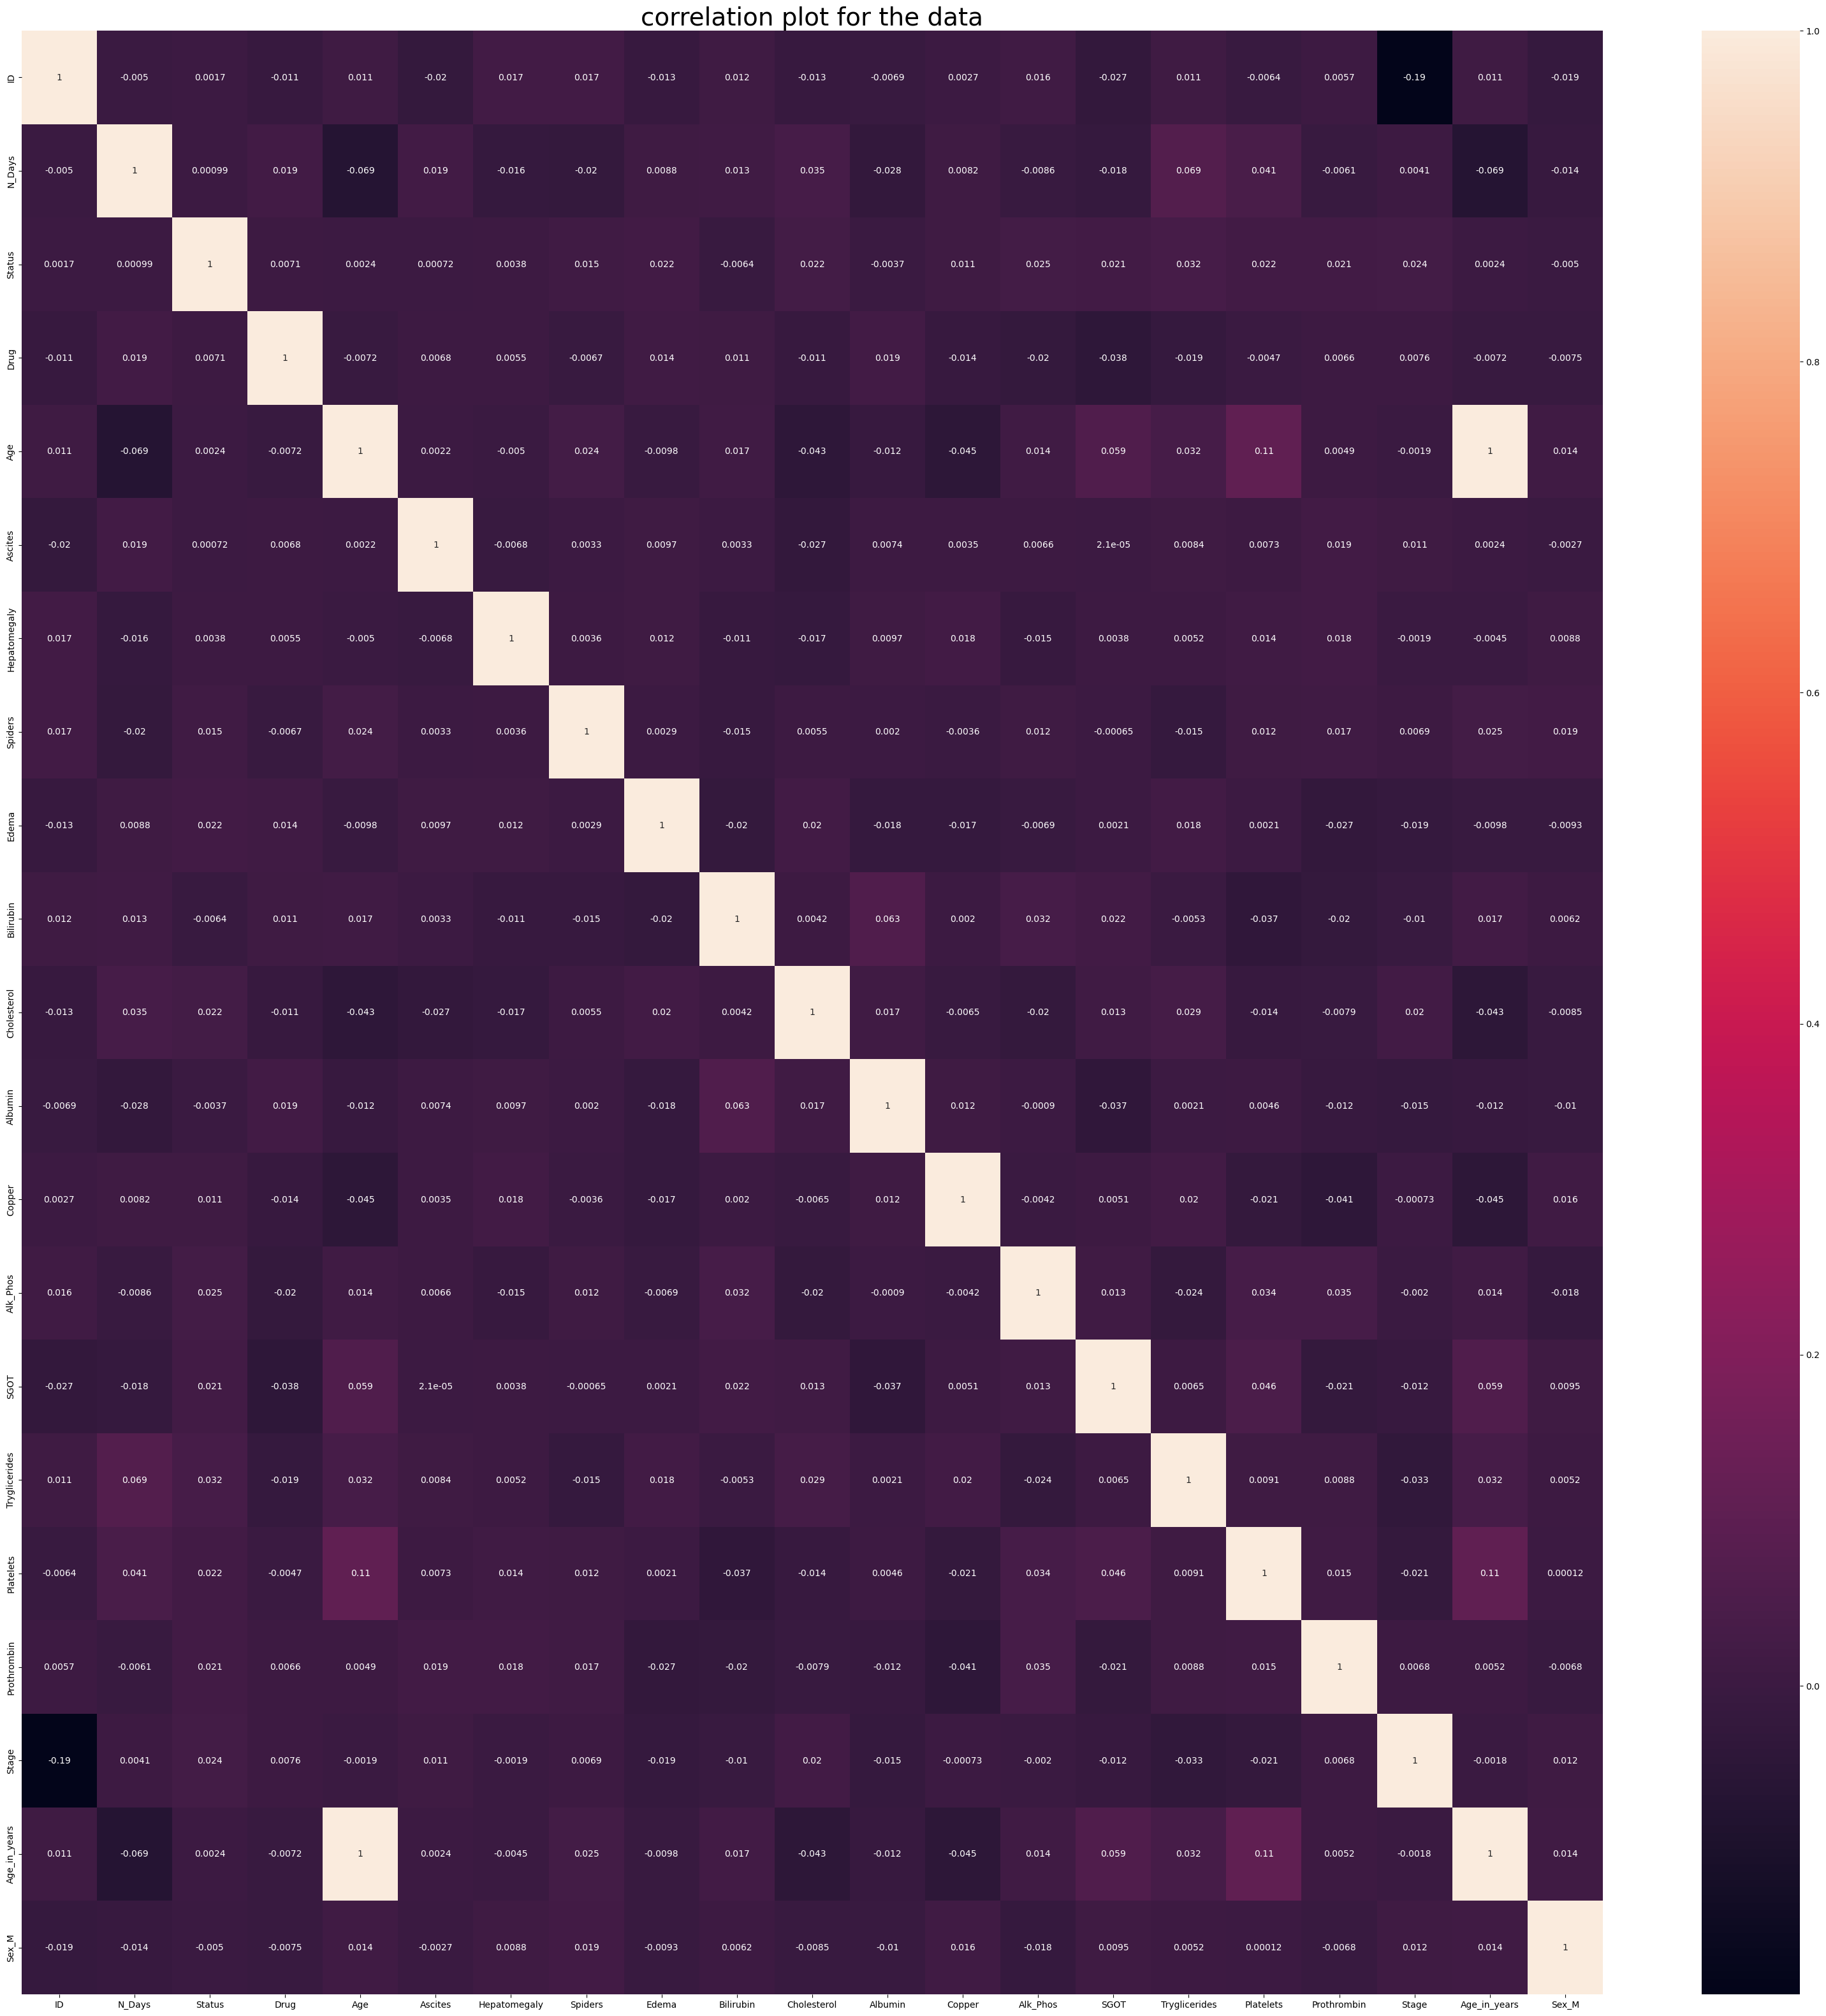

In [64]:
# correlation analysis
plt.figure(figsize=(40,40))
corr = train.corr()
sns.heatmap(corr,annot=True)
plt.title("correlation plot for the data",size=28)

# it looks redundant so lets drop our Age_in_year feature

In [65]:
train = train.drop('Age_in_years', axis=1)
test = test.drop('Age_in_years', axis=1)

In [66]:
# Now lets export the data for modelling

train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)